In [ ]:
import requests
import gzip
import shutil
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("email-Eu-core.txt", header=None, names=["source", "target"])
print(df.head())

  source  target
0    0 1     NaN
1    2 3     NaN
2    2 4     NaN
3    5 6     NaN
4    5 7     NaN


In [ ]:
import networkx as nx
import pandas as pd

# Load the real network dataset
df = pd.read_csv("email-Eu-core.txt", sep=" ", header=None, names=["source", "target"])
real_network = nx.from_pandas_edgelist(df)

# Extract key parameters
N_real = real_network.number_of_nodes()  # Number of nodes
E_real = real_network.number_of_edges()  # Number of edges

# Compute connection probability for Erdős-Rényi model
p = E_real / (N_real * (N_real - 1) / 2)

print(f"🔹 Real Network: {N_real} nodes, {E_real} edges")
print(f"🔹 Estimated Connection Probability (p) for ER Model: {p:.6f}")
# Generate Erdős-Rényi random network
ER_network = nx.erdos_renyi_graph(N_real, p)

# Get number of edges in the generated network
E_ER = ER_network.number_of_edges()

print(f"🔹 Erdős-Rényi Random Network: {N_real} nodes, {E_ER} edges")


🔹 Real Network: 1005 nodes, 16706 edges
🔹 Estimated Connection Probability (p) for ER Model: 0.033113
🔹 Erdős-Rényi Random Network: 1005 nodes, 16788 edges


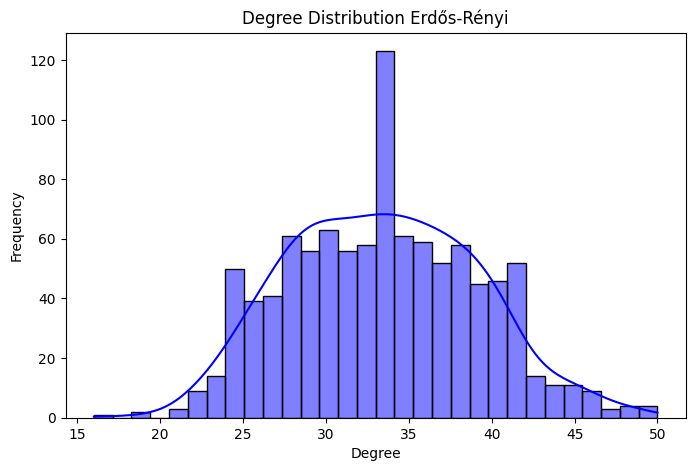

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute degree sequence
degree_sequence = [d for n, d in ER_network.degree()]

# Plot degree distribution
plt.figure(figsize=(8, 5))
sns.histplot(degree_sequence, bins=30, kde=True, color="blue")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution Erdős-Rényi")
plt.show()


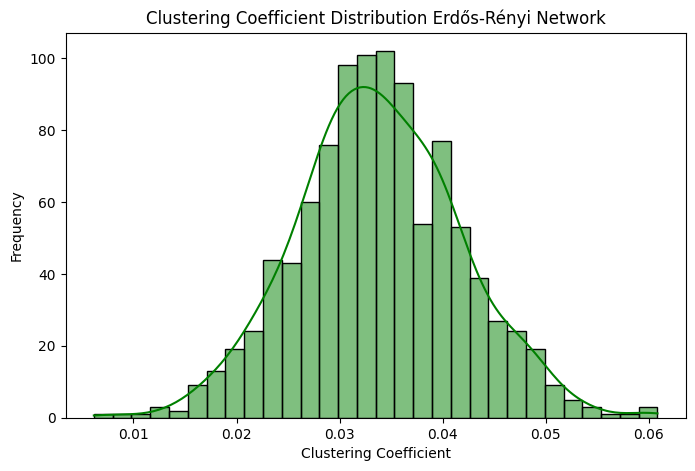

In [ ]:
# Compute clustering coefficients
clustering_coeffs = list(nx.clustering(ER_network).values())

# Plot clustering coefficient distribution
plt.figure(figsize=(8, 5))
sns.histplot(clustering_coeffs, bins=30, kde=True, color="green")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution Erdős-Rényi Network")
plt.show()


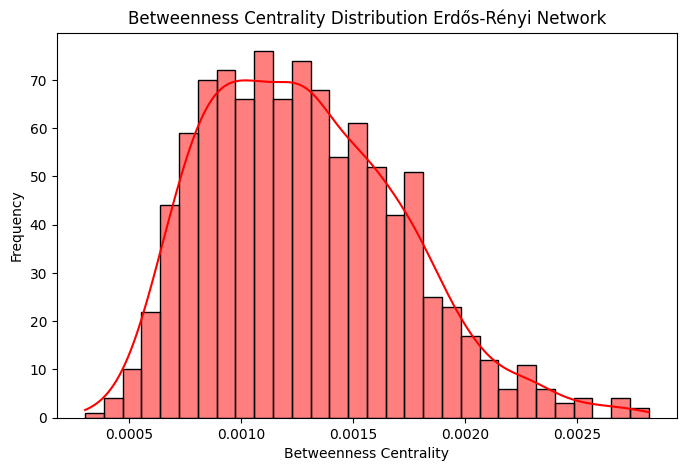

In [ ]:
# Compute betweenness centrality
betweenness_centrality = list(nx.betweenness_centrality(ER_network).values())

# Plot betweenness centrality distribution
plt.figure(figsize=(8, 5))
sns.histplot(betweenness_centrality, bins=30, kde=True, color="red")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Distribution Erdős-Rényi Network")
plt.show()


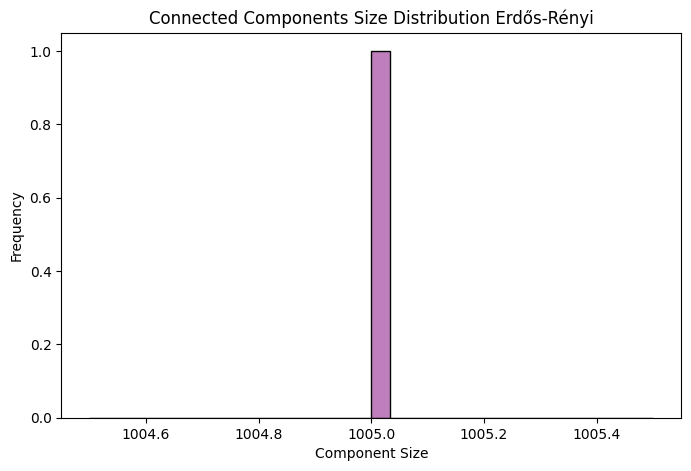

In [ ]:
# Compute sizes of connected components
component_sizes = [len(c) for c in nx.connected_components(ER_network)]

# Plot connected components size distribution
plt.figure(figsize=(8, 5))
sns.histplot(component_sizes, bins=30, kde=True, color="purple")
plt.xlabel("Component Size")
plt.ylabel("Frequency")
plt.title("Connected Components Size Distribution Erdős-Rényi")
plt.show()


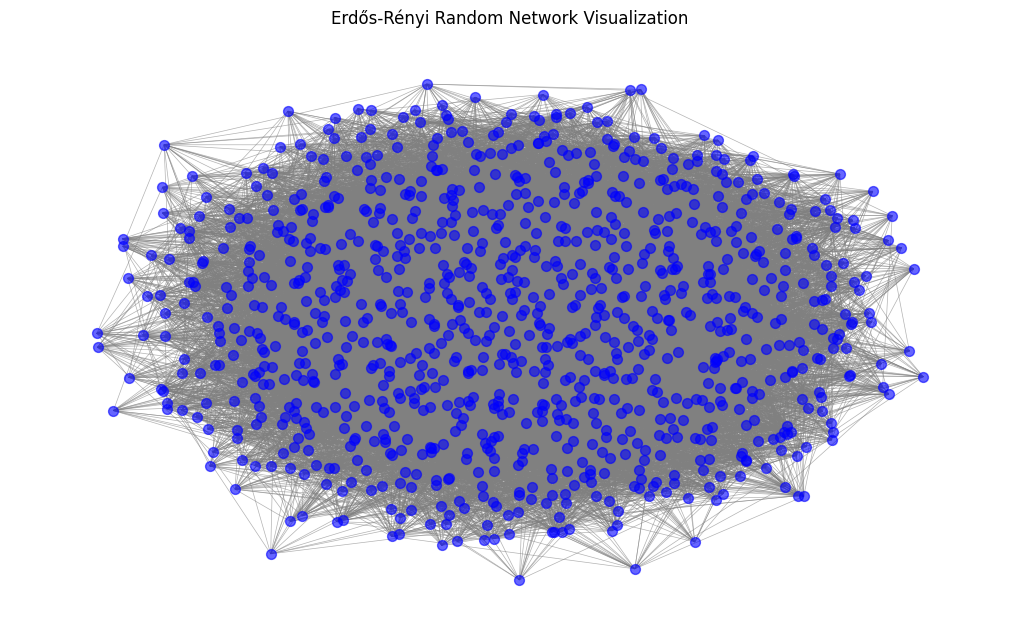

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a layout for better visualization
pos = nx.spring_layout(ER_network, seed=42)

# Draw the network
plt.figure(figsize=(10, 6))
nx.draw(
    ER_network, pos,
    node_size=50,  # Small nodes for clarity
    node_color="blue",  # Color for nodes
    edge_color="gray",  # Light edges
    alpha=0.6,  # Transparency
    width=0.5  # Thin edges
)

# Title and display
plt.title("Erdős-Rényi Random Network Visualization")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the top-ranked nodes for each centrality measure
top_nodes_table = pd.DataFrame({
    "Rank": ["1st", "2nd", "3rd", "4th", "5th"],
    "Degree (Hubs)": top_degree["Node"].values,
    "Betweenness (Bridges)": top_betweenness["Node"].values,
    "Closeness (Fastest)": top_closeness["Node"].values,
    "Eigenvector (Influence)": top_eigenvector["Node"].values
})

# Display the table
print(top_nodes_table)

# Save as an image or display in a styled format if using Jupyter
try:
    from tabulate import tabulate
    print(tabulate(top_nodes_table, headers="keys", tablefmt="github"))
except ImportError:
    pass  # If tabulate is not installed, the regular DataFrame output will be used.


NameError: name 'top_degree' is not defined